In [1]:
from __future__ import division
from spotify_client import SpotifyClient
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
def centrality_popularity(centralities,popularities, label): 
    plt.scatter(centralities,popularities)
    plt.xlabel(label)
    plt.ylabel('Popularity')
    plt.show()

In [3]:
def centrality_followers(centralities,followers,label): 
        
    plt.scatter(centralities, followers)
    plt.xlabel(label)
    plt.ylabel('followers')    
    plt.show()      

In [4]:
df=pd.read_csv("artists_df1.csv",index_col=0)
G=nx.read_gexf("rw1.gexf")    
print("num of edges:",G.number_of_edges())
indegree_centrality= G.in_degree()
#indegree_centrality.update((x, y*2) for x, y in indegree_centrality.items())
between_centrality=nx.betweenness_centrality(G)    
eigen_centrality= nx.eigenvector_centrality_numpy(G)
eigen_centrality_numpy=nx.eigenvector_centrality_numpy(G)    
closeness_centrality= nx.closeness_centrality(G)  
page_rank= nx.pagerank(G, alpha=0.9)
    

num of edges: 773


In [5]:
df['indegreeCentrality']= ""
df['eigenCentrality']=""
df['betweenCentrality']=""
df['closenessCentrality']=""
df['pageRank']=""

In [6]:
for index, row in df.iterrows():
   
    df.set_value(index,'indegreeCentrality',indegree_centrality[row['artistId']])
    df.set_value(index,'eigenCentrality',eigen_centrality_numpy[row['artistId']])
    df.set_value(index,'betweenCentrality',between_centrality[row['artistId']])
    df.set_value(index,'closenessCentrality',closeness_centrality[row['artistId']])
    df.set_value(index,'pageRank',page_rank[row['artistId']])
   

In [7]:
df.head(10)

,artistId,name,relatedArtists,followers,popularity,genres,indegreeCentrality,eigenCentrality,betweenCentrality,closenessCentrality,pageRank
0,1FEABcMZtFitRlvH8V0UJI,Aref,"['5b1CDxqOGnXr5M1DUn2XQh', '5vGVXwtTLpfUyOxX5n...",6560,29,['classic persian pop'],5,0.000402019,0.00760582,0.168731,0.00970001
1,4NdEcxTgFXf083ttLRBZOE,Bijan Mortazavi,"['5b1CDxqOGnXr5M1DUn2XQh', '2jvB5M73tBZlWybPmx...",5323,27,['classic persian pop'],13,0.000650328,0.0166953,0.171787,0.0229038
2,2jvB5M73tBZlWybPmxIaw7,Dariush,"['5b1CDxqOGnXr5M1DUn2XQh', '5WCHc16VvzVCmBKH70...",21090,36,['classic persian pop'],18,0.000632296,0.0928429,0.193163,0.0285118
3,5b1CDxqOGnXr5M1DUn2XQh,Hayedeh,"['2jvB5M73tBZlWybPmxIaw7', '1FEABcMZtFitRlvH8V...",21280,37,['classic persian pop'],23,0.000913131,0.0908366,0.203766,0.0315938
4,3pI1XXzzKOYdYCLWurc2Ky,Ebi,"['5b1CDxqOGnXr5M1DUn2XQh', '2jvB5M73tBZlWybPmx...",35235,39,['classic persian pop'],3,0.000322636,0.0395076,0.168399,0.0127616
5,78j1lyp6JO4xzjQzsjKji6,Marzieh,"['0FYkbjit3zaFIN4kvVUdGW', '2qNu2Ys8ePDMvKwixW...",3858,22,"['classic persian pop', 'persian traditional']",0,-5.40006e-18,0,0,0.000551152
6,0FYkbjit3zaFIN4kvVUdGW,Alireza Eftekhari,"['5b1CDxqOGnXr5M1DUn2XQh', '2jvB5M73tBZlWybPmx...",3269,25,"['classic persian pop', 'persian traditional']",6,0.000103776,0.0126174,0.155516,0.00457718
7,7f8OibY3PULjl3LFgONPXC,Fereidoon Foroughi,"['5b1CDxqOGnXr5M1DUn2XQh', '0FYkbjit3zaFIN4kvV...",3926,25,['classic persian pop'],7,0.000107526,0.0201138,0.15637,0.0052755
8,0cuFX3PhgtIqQDKPLCL854,Viguen,"['5b1CDxqOGnXr5M1DUn2XQh', '5fDiPm7RFIZx73fNwn...",5295,29,['classic persian pop'],11,0.000445974,0.0134161,0.169066,0.0160021
9,6XJ5KXl0DaiBPd5xH5x7i5,Houshmand Aghili,"['1grC023GSmH0FTqX3Pwxgw', '1Sz090MImPxme9m9F5...",963,13,['classic persian pop'],7,-1.21405e-15,0.00566656,0.0376244,0.00350027


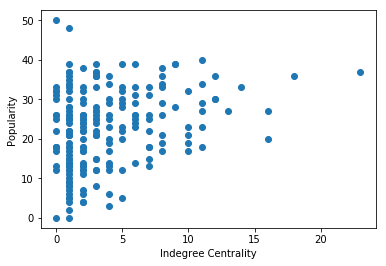

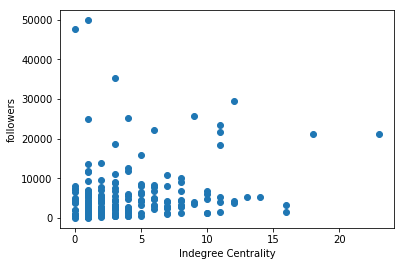

In [8]:
centrality_popularity(df['indegreeCentrality'], df['popularity'], 'Indegree Centrality' )
centrality_followers(df['indegreeCentrality'], df['followers'], 'Indegree Centrality' )

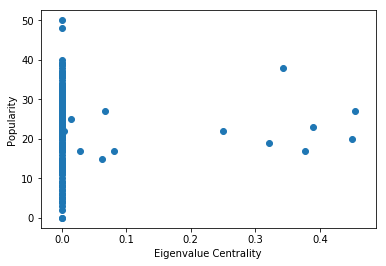

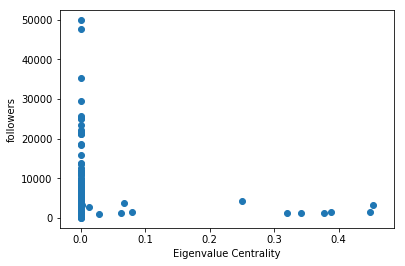

In [9]:
centrality_popularity(df['eigenCentrality'], df['popularity'], 'Eigenvalue Centrality' )
centrality_followers(df['eigenCentrality'], df['followers'], 'Eigenvalue Centrality' )

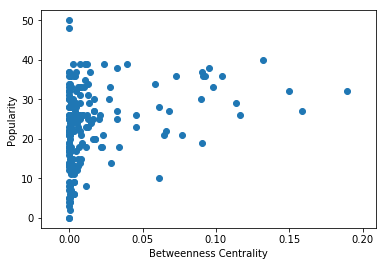

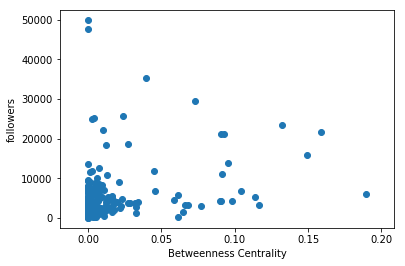

In [10]:
centrality_popularity(df['betweenCentrality'], df['popularity'], 'Betweenness Centrality' )
centrality_followers(df['betweenCentrality'], df['followers'], 'Betweenness Centrality' )

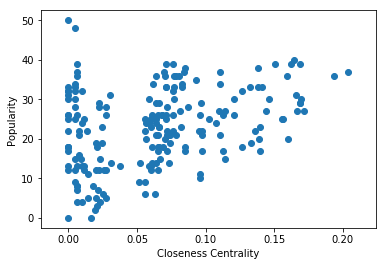

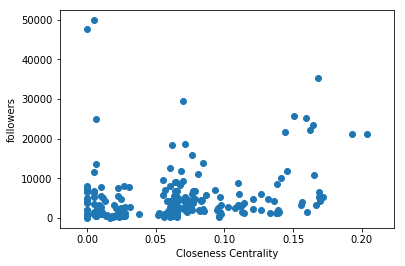

In [11]:
centrality_popularity(df['closenessCentrality'], df['popularity'], 'Closeness Centrality' )
centrality_followers(df['closenessCentrality'], df['followers'], 'Closeness Centrality' )

In [12]:
def average_overlap(df1,df2,depth):
        temp1=[]
        temp2=[]
        AO=0
        for i in range(depth):      
            temp1.append(df1.iloc[i]['artistId'])
            temp2.append(df2.iloc[i]['artistId'])
            overlap=len(set(temp1) & set(temp2))  
            overlap=overlap/(i+1)        
            AO +=overlap
        
        AO= AO/depth
        return AO

In [13]:
print(average_overlap(df.sort_values('indegreeCentrality', ascending=False),df.sort_values('popularity', ascending=False), 20 ))
print(average_overlap(df.sort_values('indegreeCentrality', ascending=False),df.sort_values('followers', ascending=False), 20 ))

0.05073832299451494
0.18179969712090455


In [14]:
df1=df.sort_values('indegreeCentrality', ascending=False)

In [15]:
df1.head()

,artistId,name,relatedArtists,followers,popularity,genres,indegreeCentrality,eigenCentrality,betweenCentrality,closenessCentrality,pageRank
3,5b1CDxqOGnXr5M1DUn2XQh,Hayedeh,"['2jvB5M73tBZlWybPmxIaw7', '1FEABcMZtFitRlvH8V...",21280,37,['classic persian pop'],23,0.000913131,0.0908366,0.203766,0.0315938
2,2jvB5M73tBZlWybPmxIaw7,Dariush,"['5b1CDxqOGnXr5M1DUn2XQh', '5WCHc16VvzVCmBKH70...",21090,36,['classic persian pop'],18,0.000632296,0.0928429,0.193163,0.0285118
27,0EffwahbVorwsGoVtfovXM,Hengameh,"['3Tf5EjUPHi04W0filXAkrG', '5coMLgB6HtAg6rf9QV...",3208,27,"['classic persian pop', 'persian pop']",16,0.45402,0.0167809,0.166754,0.0303832
28,3Tf5EjUPHi04W0filXAkrG,Nooshafarin,"['0EffwahbVorwsGoVtfovXM', '5akOgE7THgqgmt4fAx...",1644,20,['classic persian pop'],16,0.449415,0.016295,0.159884,0.0288578
32,5soNWYxH02JzesP081GwEl,Macan Band,"['2uae2HQyeF6uSsV7u1cUF2', '67kWRUuakWQ7zpgUCL...",5238,33,['persian pop'],14,7.03719e-09,0.00984992,0.0713919,0.0190887


In [16]:
df1[df1['popularity']<20]

,artistId,name,relatedArtists,followers,popularity,genres,indegreeCentrality,eigenCentrality,betweenCentrality,closenessCentrality,pageRank
102,1Ztcq0hkmzT4gWfmWZx3wu,Soheil Nafisi,"['1aAvWm4c1RQ2HnxFQYGFKS', '2NzB7sjEg2k46XhFXe...",4160,18,"['classic persian pop', 'persian alternative']",11,1.44274e-10,0.0338113,0.065726,0.00863924
26,2Y2gsVQ9NzlSlQdCgnQ6ug,Shahrokh,"['0EffwahbVorwsGoVtfovXM', '3Tf5EjUPHi04W0filX...",1300,17,['classic persian pop'],10,0.377005,0.00496975,0.139279,0.0223416
23,69bVyzCRQweGwImywypLRD,Susan Roshan,"['5akOgE7THgqgmt4fAxQkre', '2HGF8MZq8nygoAlDB3...",1276,19,['classic persian pop'],10,0.320683,0.00880614,0.133195,0.0198509
87,0tctijgZruddzQ8FCgvDj2,Reza Yazdani,"['6V6v6VpsjWE28oeoAnqPhg', '1W5u8Bz2yimyuuI8QN...",4426,19,['classic persian pop'],8,4.82106e-10,0.0904333,0.0741129,0.00739288
86,4uGBJ4gqsK7NAUb3DKTL7Q,Wantons,"['5y33cZ1Lo1YVUjraV880Lb', '2SFwcduI9cdZsG6Uxn...",2782,17,['persian hip hop'],8,3.61645e-10,0.000745025,0.0717414,0.0137929
89,5TJxWW696uXFzZYpp9b6nk,Farzin,"['69bVyzCRQweGwImywypLRD', '5akOgE7THgqgmt4fAx...",1233,15,['classic persian pop'],7,0.0627227,0.00261179,0.113989,0.00512101
134,2NzB7sjEg2k46XhFXeYi2v,Peyman Yazdanian,"['42SXWPm6yVlwZQKfmZGoIb', '129o0b0q8hAgjrd7jD...",2942,18,"['persian alternative', 'persian neo-tradition...",7,8.55634e-11,0.0223019,0.0608974,0.00901914
107,5F3JQSbuDo4pWGLC2UTLTI,The Ways,"['0tctijgZruddzQ8FCgvDj2', '4besYDIj6c0kONEoL2...",2662,18,['persian alternative'],7,2.69054e-10,0.0216813,0.0686319,0.00738546
9,6XJ5KXl0DaiBPd5xH5x7i5,Houshmand Aghili,"['1grC023GSmH0FTqX3Pwxgw', '1Sz090MImPxme9m9F5...",963,13,['classic persian pop'],7,-1.21405e-15,0.00566656,0.0376244,0.00350027
127,4besYDIj6c0kONEoL2fFqP,Radio Tehran,"['5YoplpynBN976eNYXe9ZrF', '01xUafSGlkbklhhima...",2320,14,['persian alternative'],6,1.16659e-10,0.00710149,0.0641941,0.00700944


In [17]:
print(average_overlap(df.sort_values('eigenCentrality', ascending=False),df.sort_values('popularity', ascending=False), 20 ))
print(average_overlap(df.sort_values('eigenCentrality', ascending=False),df.sort_values('followers', ascending=False), 20 ))

0.06181886525926774
0.03423082829623077


In [18]:
print(average_overlap(df.sort_values('betweenCentrality', ascending=False),df.sort_values('popularity', ascending=False), 20 ))
print(average_overlap(df.sort_values('betweenCentrality', ascending=False),df.sort_values('followers', ascending=False), 20 ))

0.15852129359288802
0.19172886002026865


In [19]:
print(average_overlap(df.sort_values('closenessCentrality', ascending=False),df.sort_values('popularity', ascending=False), 20 ))
print(average_overlap(df.sort_values('closenessCentrality', ascending=False),df.sort_values('followers', ascending=False), 20 ))

0.16411995147095765
0.24333872676171436


In [20]:
type(df['indegreeCentrality'])

pandas.core.series.Series

In [21]:
#pearson and spearman correlation 
print("Pearson corr of indegree centrality and popularity:",df['indegreeCentrality'].astype('float64').corr(df['popularity']))
print("Pearson corr of indegree centrality and followers:",df['indegreeCentrality'].astype('float64').corr(df['followers']))
print("Spearman corr of indegree centrality and popularity:",df['indegreeCentrality'].astype('float64').corr(df['popularity'], method='spearman'))
print("Spearman corr of indegree centrality and followers:",df['indegreeCentrality'].astype('float64').corr(df['followers'], method='spearman'))

Pearson corr of indegree centrality and popularity: 0.281885404997
Pearson corr of indegree centrality and followers: 0.212704851156
Spearman corr of indegree centrality and popularity: 0.266166281569
Spearman corr of indegree centrality and followers: 0.282859759868


In [22]:
print("Pearson corr of eigen centrality and popularity:",df['eigenCentrality'].astype('float64').corr(df['popularity']))
print("Pearson corr of eigen centrality and followers:",df['eigenCentrality'].astype('float64').corr(df['followers']))
print("Spearman corr of eigen centrality and popularity:",df['eigenCentrality'].astype('float64').corr(df['popularity'], method='spearman'))
print("Spearman corr of eigen centrality and followers:",df['eigenCentrality'].astype('float64').corr(df['followers'], method='spearman'))

Pearson corr of eigen centrality and popularity: 0.00948437008597
Pearson corr of eigen centrality and followers: -0.0970639305316
Spearman corr of eigen centrality and popularity: 0.37849276966
Spearman corr of eigen centrality and followers: 0.243620614589


In [23]:
print("Pearson corr of betweenness centrality and popularity:",df['betweenCentrality'].astype('float64').corr(df['popularity']))
print("Pearson corr of betweenness centrality and followers:",df['betweenCentrality'].astype('float64').corr(df['followers']))
print("Spearman corr of betweenness centrality and popularity:",df['betweenCentrality'].astype('float64').corr(df['popularity'], method='spearman'))
print("Spearman corr of betweenness centrality and followers:",df['betweenCentrality'].astype('float64').corr(df['followers'], method='spearman'))

Pearson corr of betweenness centrality and popularity: 0.30005403846
Pearson corr of betweenness centrality and followers: 0.274308561589
Spearman corr of betweenness centrality and popularity: 0.342978075566
Spearman corr of betweenness centrality and followers: 0.318149520784


In [24]:
print("Pearson corr of closeness centrality and popularity:",df['closenessCentrality'].astype('float64').corr(df['popularity']))
print("Pearson corr of closeness centrality and followers:",df['closenessCentrality'].astype('float64').corr(df['followers']))
print("Spearman corr of closeness centrality and popularity:",df['closenessCentrality'].astype('float64').corr(df['popularity'], method='spearman'))
print("Spearman corr of closeness centrality and followers:",df['closenessCentrality'].astype('float64').corr(df['followers'], method='spearman'))

Pearson corr of closeness centrality and popularity: 0.354120367213
Pearson corr of closeness centrality and followers: 0.214387116102
Spearman corr of closeness centrality and popularity: 0.331294296952
Spearman corr of closeness centrality and followers: 0.257716758245


In [25]:
df.to_csv("df_data.csv")